In [1]:
from rdkit import Chem
from rdsl.functional_groups import get_functional_group_matches, get_all_functional_group_patterns
from rdsl.highlight import highlight_atoms
from rdsl.select import select_atoms, select_atom_ids, select_molecule
mol = Chem.MolFromSmiles("N1C=C(F)C=C1C1=CC2NCCC(C(=O)[O-])C=2C=C1")

[12:44:53] Conflicting single bond directions around double bond at index 10.
[12:44:53]   BondStereo set to STEREONONE and single bond directions set to NONE.


### Selection language
#### Pharmacophores
Uses the RDKit base features `Path(RDConfig.RDDataDir) / "BaseFeatures.fdef")` to select common pharmacophores

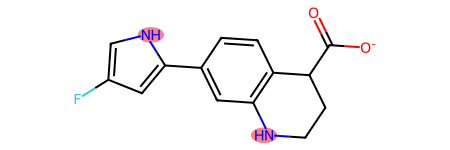

In [2]:
atom_ids = select_atom_ids(mol, "donors")
mol

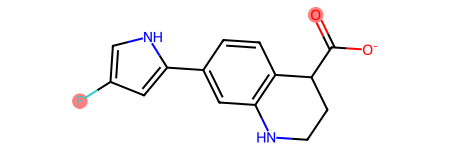

In [3]:
atom_ids = select_atom_ids(mol, "acceptors")
mol

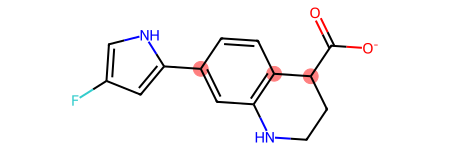

In [4]:
atom_ids = select_atom_ids(mol, "hydrophobes")
mol

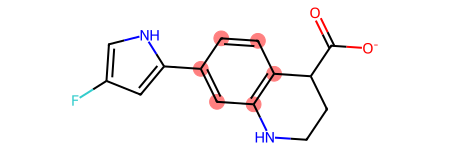

In [5]:
atom_ids = select_atom_ids(mol, "lumped_hydrophobes")
mol

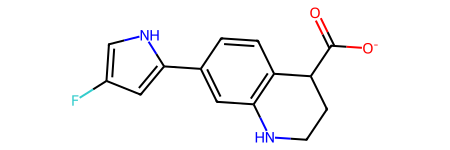

In [6]:
atom_ids = select_atom_ids(mol, "pos_ionizable")
mol

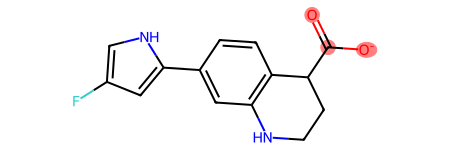

In [7]:
atom_ids = select_atom_ids(mol, "neg_ionizable")
mol

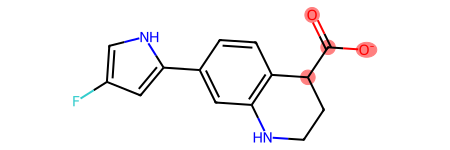

In [8]:
atom_ids = select_atom_ids(mol, "zn_binders")
mol

#### Substructure Alerts
Uses PAINS, BMS and Glaxo libraries to highlight known problematic substructures

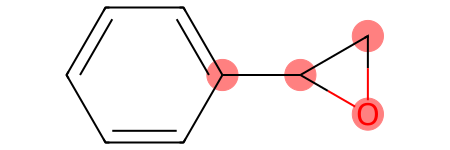

In [9]:
_mol = Chem.MolFromSmiles("c1ccccc1C1CO1")
atom_ids = select_atom_ids(_mol, "alerts")
_mol

#### Entity expansion


`byring S1` Expands S1 to the largest ring it's part of

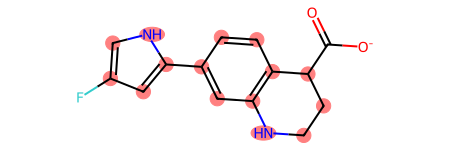

In [10]:
atom_ids = select_atom_ids(mol, "byring (elem N)")
mol

`byfunctional S1` Expands S1 to the largest functional group it's part of. Uses the 40k SMARTS from [SMARTS Chemist](https://chemist.smarts.plus/).

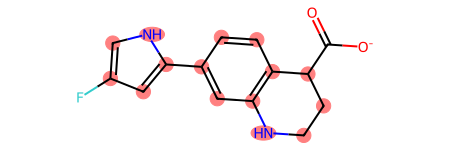

In [11]:
# The 4 donors expand to the full piperazine, carboxamide, secondary amine and carboxylic acid
atom_ids = select_atom_ids(mol, "byfunctional donors")
mol

`bymolecule S1` Expands S1 to complete molecules (connected with bonds)

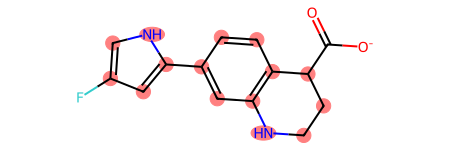

In [12]:
mol0 = Chem.MolFromSmiles("c1c(Nc2ncccn2)cccc1.[nH]1cccc1")
atom_ids = select_atom_ids(mol0, "bymolecule ringsize 5")
mol

`byresidue S1` Expands S1 to complete residues (using the residue name in PDB files)

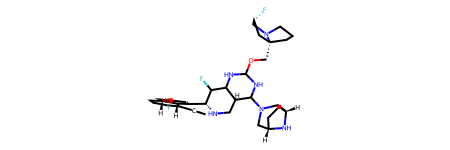

In [13]:
!wget https://files.rcsb.org/download/7RPZ.pdb -O /tmp/7RPZ.pdb > /dev/null 2>&1
cocomplex = Chem.MolFromPDBFile("/tmp/7RPZ.pdb")
select_molecule(cocomplex, "byres elem F")

#### Atom properties


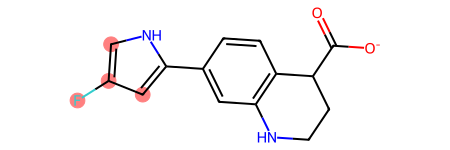

In [14]:
atom_ids = select_atom_ids(mol, "index 1-4")
mol

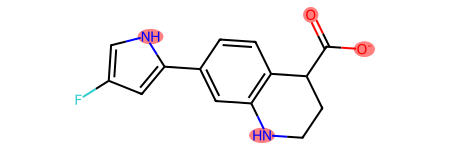

In [15]:
atom_ids = select_atom_ids(mol, "elem O+N") # same `as elem O or elem N`
mol

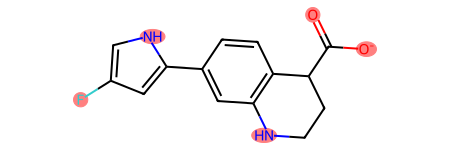

In [16]:
atom_ids = select_atom_ids(mol, "not atomic_number 6")
mol

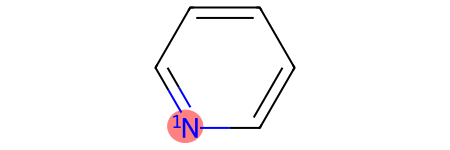

In [17]:
_mol = Chem.MolFromSmiles("c1cnccc1")
for atom in _mol.GetAtoms():
    if atom.GetSymbol()=="N":
        atom.SetIsotope(1)
atom_ids = select_atom_ids(_mol, "isotope 1") # By default all atoms have an isotope of 0
_mol

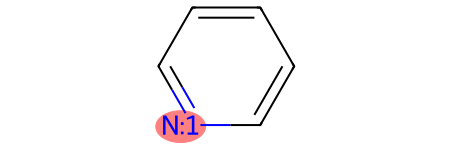

In [18]:
_mol = Chem.MolFromSmiles("c1cnccc1")
for atom in _mol.GetAtoms():
    if atom.GetSymbol()=="N":
        atom.SetAtomMapNum(1)
atom_ids = select_atom_ids(_mol, "not atom_map_number 0") # By default all atoms have an atom map number of 0
_mol

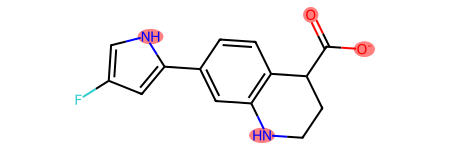

In [19]:
# Uses MMFF
atom_ids = select_atom_ids(mol, "partial_charge < -0.3")
mol

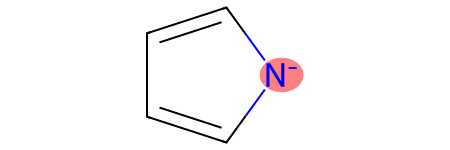

In [20]:
mol1 = Chem.MolFromSmiles("[n-]1cccc1")
atom_ids = select_atom_ids(mol1, "formal_charge <= -1")
mol1

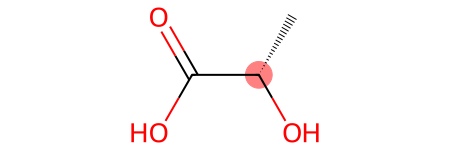

In [21]:
mol2 = Chem.MolFromSmiles("C[C@H](O)C(=O)O")
atom_ids = select_atom_ids(mol2, "stereo S")
mol2

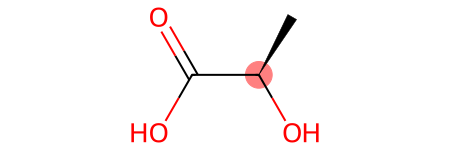

In [22]:
mol2 = Chem.MolFromSmiles("C[C@@H](O)C(=O)O")
atom_ids = select_atom_ids(mol2, "stereo R")
mol2

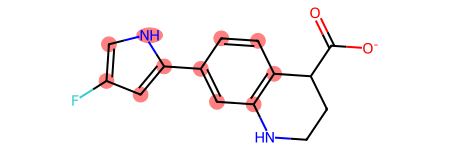

In [23]:
atom_ids = select_atom_ids(mol, "ring and aromatic")
mol

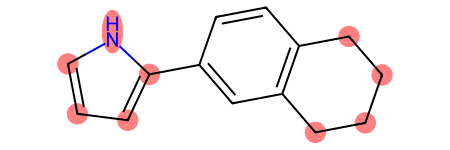

In [24]:
mol3 = Chem.MolFromSmiles("N1C=CC=C1C1=CC2CCCCC=2C=C1")
atom_ids = select_atom_ids(mol3, "aliphatic or (aromatic and ringsize 5)")
mol3

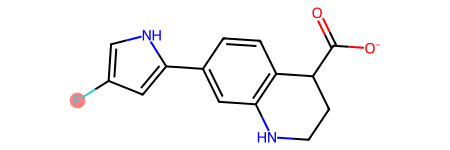

In [25]:
atom_ids = select_atom_ids(mol, "mass > 16")
mol

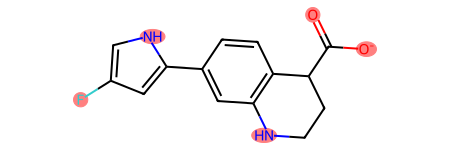

In [26]:
atom_ids = select_atom_ids(mol, "valence <4")
mol

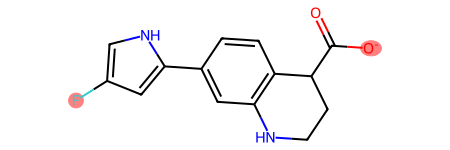

In [27]:
atom_ids = select_atom_ids(mol, "explicit_valence 1")
mol

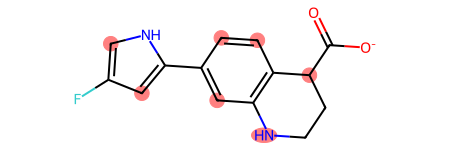

In [28]:
atom_ids = select_atom_ids(mol, "implicit_valence 1")
mol

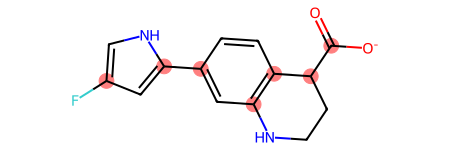

In [29]:
atom_ids = select_atom_ids(mol, "degree 3")
mol

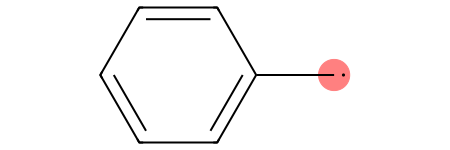

In [30]:
_mol = Chem.MolFromSmiles("[CH2]c1ccccc1")
atom_ids = select_atom_ids(_mol, "radical_electrons 1")
_mol

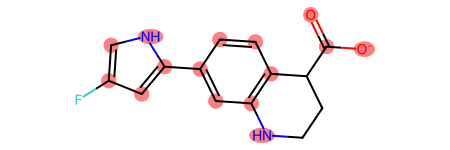

In [31]:
# One of OTHER, S, SP, SP2, SP2D, SP3, SP3D, SP3D2, UNSPECIFIED
atom_ids = select_atom_ids(mol, "hybridization SP2")
mol

#### PDB properties

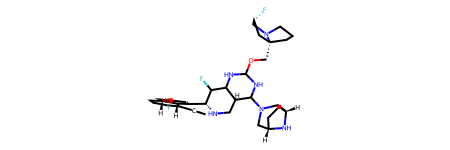

In [32]:
# Select by residue name
select_molecule(cocomplex, "resn 6IC")

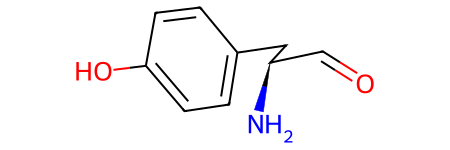

In [33]:
#todo
select_molecule(cocomplex, "resi 4")

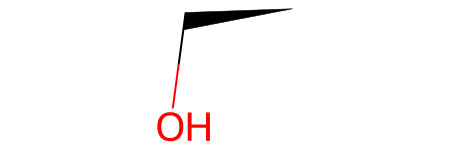

In [34]:
select_molecule(cocomplex, "alt A")

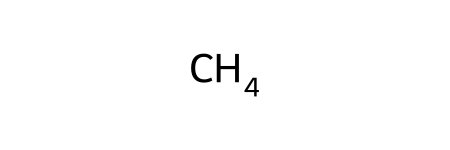

In [35]:
# Grab the C-alpha of tyrosine with residue number 4
select_molecule(cocomplex, "name CA and resi 4 and resn TYR")

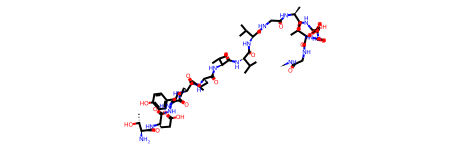

In [36]:
# Use the PDB atom id *not* the internal RDKit index
select_molecule(cocomplex, "id 1-100")

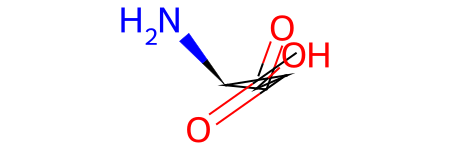

In [37]:
# Get residue G12 chain A
select_molecule(cocomplex, "chain A and resn ASP and resi 12")

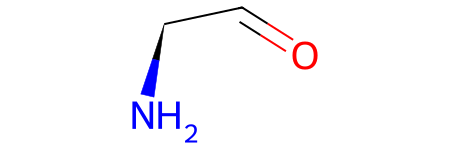

In [38]:
# Get backbone of residue ATYR4 
select_molecule(cocomplex, "backbone and chain A and resn TYR and resi 4")

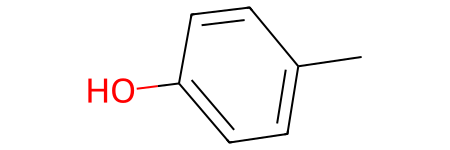

In [39]:
# Get sidechain of residue ATYR4 
select_molecule(cocomplex, "sidechain and chain A and resn TYR and resi 4")

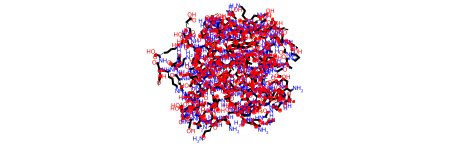

In [40]:
select_molecule(cocomplex, "protein")

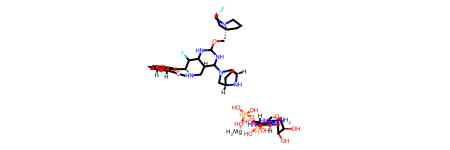

In [41]:
# ATP and residue 6IC (inhibitor)
select_molecule(cocomplex, "hetatm and not solvent")

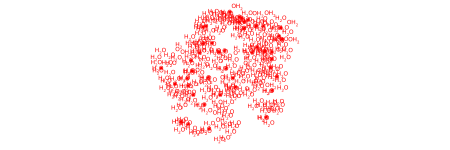

In [42]:
select_molecule(cocomplex, "solvent")

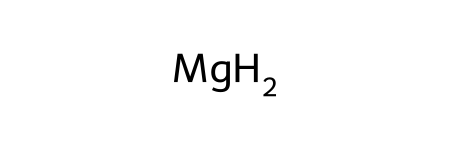

In [43]:
# Select the Mg in the ATP pocket
select_molecule(cocomplex, "metals")

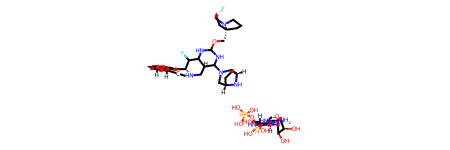

In [44]:
select_molecule(cocomplex, "organic")

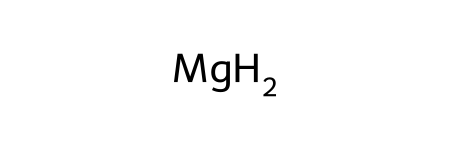

In [45]:
select_molecule(cocomplex, "inorganic")

[12:44:56] Explicit valence for atom # 31 O, 3, is greater than permitted
2026-02-28 12:44:56.251 | DEBUG    | rdsl.select.core:select_molecule:142 - Sanitization produced warnings for subset molecule


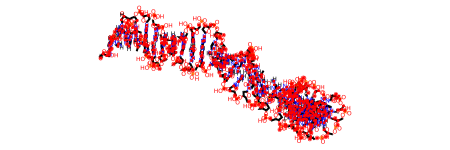

In [46]:
!wget https://files.rcsb.org/download/1CGP.pdb -O /tmp/1CGP.pdb > /dev/null 2>&1
dna = Chem.MolFromPDBFile("/tmp/1CGP.pdb", sanitize=False)
select_molecule(dna, "nucleic")

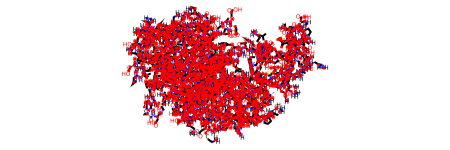

In [47]:
select_molecule(dna, "protein")

[12:44:57] Explicit valence for atom # 170 O, 3, is greater than permitted
2026-02-28 12:44:57.179 | DEBUG    | rdsl.select.core:select_molecule:142 - Sanitization produced warnings for subset molecule


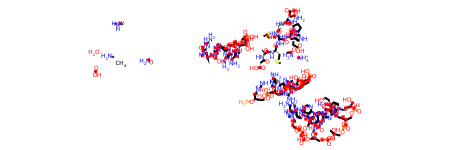

In [48]:
# Atoms with b-factors over 99
select_molecule(dna, "b > 99")

[12:44:57] Explicit valence for atom # 170 O, 3, is greater than permitted
2026-02-28 12:44:57.546 | DEBUG    | rdsl.select.core:select_molecule:142 - Sanitization produced warnings for subset molecule


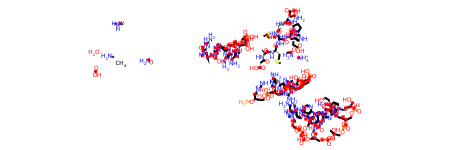

In [49]:
# Atoms with b-factors over 99
select_molecule(dna, "b > 99")

[12:44:57] Explicit valence for atom # 31 O, 3, is greater than permitted
2026-02-28 12:44:57.629 | DEBUG    | rdsl.select.core:select_molecule:142 - Sanitization produced warnings for subset molecule


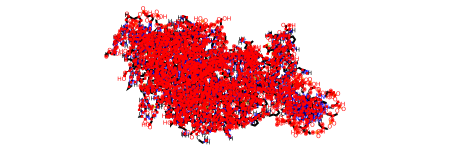

In [50]:
# Atoms with occupancy equal to 1
select_molecule(dna, "q 1")

#### Bond expansion

`S1 extend 2` Expands S1 by 2 bonds connected to atoms in S1.

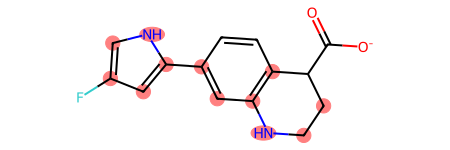

In [51]:
atom_ids = select_atom_ids(mol, "elem N extend 2")
mol

`bound_to S1` Atoms directly bonded to S1 including S1. Same as `S1 extend 1`.

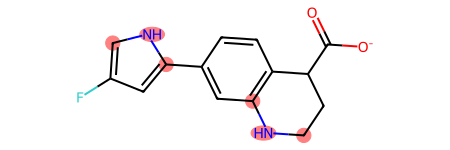

In [52]:
atom_ids = select_atom_ids(mol, "bound_to elem N")
mol

`neighbor S1` Atoms directly bonded to S1 excluding S1.

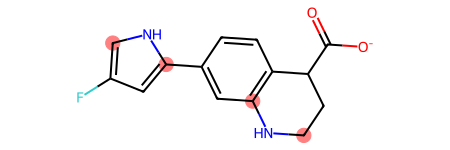

In [53]:
atom_ids = select_atom_ids(mol, "neighbor elem N")
mol

#### Proximity

`S1 within 5 of S2` Atoms in S1 that are within 5 Angstroms of any atom in
S2

[12:44:58] non-ring atom 17 marked aromatic
2026-02-28 12:44:58.324 | DEBUG    | rdsl.select.core:select_molecule:142 - Sanitization produced warnings for subset molecule


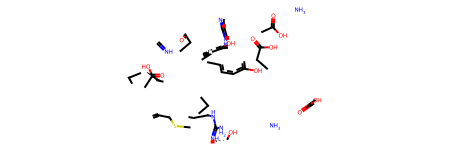

In [54]:
select_molecule(cocomplex, "sidechain within 5 of resn 6IC")

[12:44:58] non-ring atom 40 marked aromatic
2026-02-28 12:44:58.404 | DEBUG    | rdsl.select.core:select_molecule:142 - Sanitization produced warnings for subset molecule


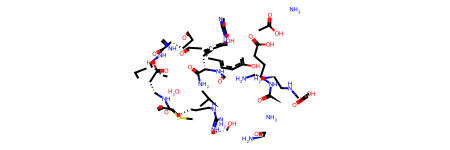

In [55]:
# Get full residues within 5Ang of the ligand
select_molecule(cocomplex, "byres sidechain within 5 of resn 6IC")

`S1 around 5` Atoms with centers within 5 Angstroms of the center of
any atom in S1

[12:44:58] non-ring atom 46 marked aromatic
2026-02-28 12:44:58.472 | DEBUG    | rdsl.select.core:select_molecule:142 - Sanitization produced warnings for subset molecule


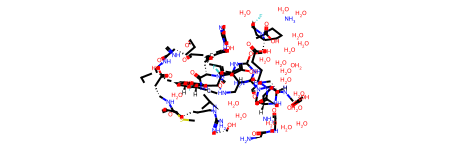

In [56]:
#Includes the ligand, any waters and any atoms with 5Ang of the ligand
select_molecule(cocomplex, "resn 6IC around 5")

`S1 beyond 12.3 of S2` Atoms in S1 that are at least 12.3 Anstroms away from S2

[12:44:58] non-ring atom 13 marked aromatic
2026-02-28 12:44:58.553 | DEBUG    | rdsl.select.core:select_molecule:142 - Sanitization produced warnings for subset molecule


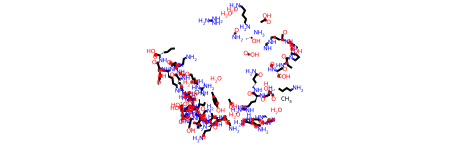

In [57]:
# Just the outside of the protein, far from the ligand
select_molecule(cocomplex, "protein beyond 30 of resn 6IC")

#### SMARTS

`S1 beyond 12.3 of S2` Atoms in S1 that are at least 12.3 Anstroms away from S2

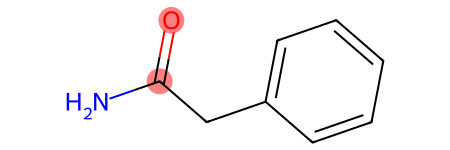

In [58]:
_mol = Chem.MolFromSmiles("NC(=O)Cc1ccccc1")
select_atom_ids(_mol, 'smarts " [C,N;R0]=O"')
_mol

#### Functional groups

`get_functional_group_matches` Get a description of all hierarchical functional groups in a molecule

        name                        atom_ids                 smarts   group  \
0    azecine  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)      C1=CC=CC=NC=CC=C1  cyclic   
1  quinoline  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)  C1=CC=C2C(=C1)C=CC=N2  cyclic   

  pattern_type  
0       smiles  
1       smiles  


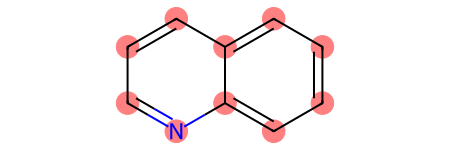

In [59]:
# This uses the sensationally useful list of 40000 SMARTS from https://chemist.smarts.plus/
_mol = Chem.MolFromSmiles("N1=CC=CC2=CC=CC=C12")
df = get_functional_group_matches(_mol, include_overshadowed=False)
print(df.head(10))
row=df.iloc[0]
# Highlight by atom IDs
highlight_atoms(_mol, atom_ids=row.atom_ids)

`Functional` select any other the above functional groups

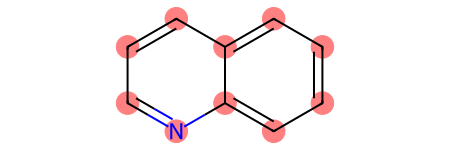

In [60]:
select_atom_ids(_mol, "functional azecine")
_mol

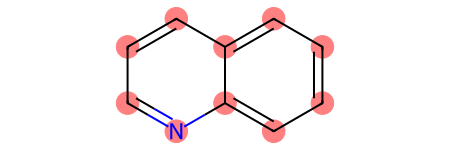

In [61]:
select_atom_ids(_mol, "functional pyridine+benzene")
_mol

In [62]:
df = get_functional_group_matches(mol, include_overshadowed=False)
df.head(5)

,name,atom_ids,smarts,group,pattern_type
0,carboxylic acid,"(13, 14, 15)","[CX3](=O)[O-,OH]",functional_group,smarts
1,fluorine,"(3,)",[FX1],functional_group,smarts
2,"1,2,3,4-tetrahydroquinoline","(6, 7, 8, 9, 10, 11, 12, 16, 17, 18)",C1CC2=CC=CC=C2NC1,cyclic,smiles
3,pyrrole,"(0, 1, 2, 4, 5)",C1=CNC=C1,cyclic,smiles


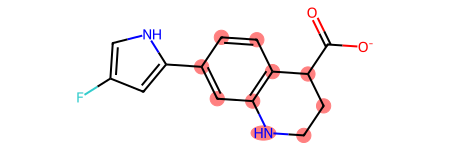

In [63]:
# Anything starting with a number will require quotes around the functional group name
select_atom_ids(mol, "functional '1,2,3,4-tetrahydroquinoline'")
mol

In [64]:
# All functional group patterns can be found here

# WARNING: These SMARTS patterns are taken from 
# https://github.com/torbengutermuth/SmartChemist/blob/main/smarts/License_for_patterns_here
# These patterns have a Creative Commons Attribution-NoDerivatives 4.0 International Public License
# If you use these patterns in your own code, remember to credit them!
# Do NOT modify the patterns without permission!

patterns_df = get_all_functional_group_patterns()
patterns_df

,name,smarts,group,pattern_type,pattern,priority,hierarchy
0,"1,2-dialdehyde",O=[#6H1X3$(*[#6])][#6H1X3$(*[#6])]=O,functional_group,smarts,<rdkit.Chem.rdchem.Mol object at 0x11a28bd80>,0,"{aldehyde, carbonyl, acyl group}"
1,"1,2-diketoaldehyde",O=[#6X3H0$(*([#6])[#6])][#6H1X3$(*[#6])]=O,functional_group,smarts,<rdkit.Chem.rdchem.Mol object at 0x11a28bd10>,1,"{ketone, carbonyl, acyl group}"
2,"1,2-diketone",O=[#6X3H0$(*([#6])[#6])][#6X3H0$(*([#6])[#6])]=O,functional_group,smarts,<rdkit.Chem.rdchem.Mol object at 0x11a28bed0>,2,"{ketone, carbonyl, acyl group}"
3,"1,3-dialdehyde",O=[#6H1X3$(*[#6])]*[#6H1X3$(*[#6])]=O,functional_group,smarts,<rdkit.Chem.rdchem.Mol object at 0x11a28bf40>,3,"{aldehyde, carbonyl, acyl group}"
4,"1,3-diketoaldehyde",O=[#6X3H0$(*([#6])[#6])]*[#6H1]=O,functional_group,smarts,<rdkit.Chem.rdchem.Mol object at 0x11a28bbc0>,4,"{ketone, carbonyl, acyl group}"
...,...,...,...,...,...,...,...
40959,valine,"C[C!R](C)C([C$(*-[N,O])]=O)N",biological,smarts,<rdkit.Chem.rdchem.Mol object at 0x11f8ce880>,40959,"{glycine, alanine, carbonyl}"
40960,m-cresol,[CH3]c1cc(O)ccc1,biological,smarts,<rdkit.Chem.rdchem.Mol object at 0x11f8ce8f0>,40960,"{methyl, toluene}"
40961,o-cresol,[CH3]c1c(O)cccc1,biological,smarts,<rdkit.Chem.rdchem.Mol object at 0x11f8ce960>,40961,"{methyl, toluene}"
40962,p-cresol,[CH3]c1ccc(O)cc1,biological,smarts,<rdkit.Chem.rdchem.Mol object at 0x11f8ce9d0>,40962,"{methyl, toluene}"


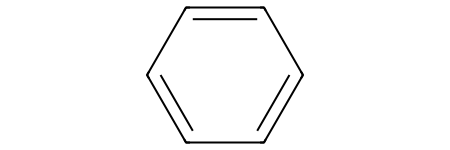

In [66]:
from rdkit import Chem
from rdsl.select import select_molecule
toluene = Chem.MolFromSmiles("Cc1ccccc1")
# All broken bonds have implicit hydrogens added to satisfy valence
select_molecule(toluene, "ring", broken_bonds="hydrogens")

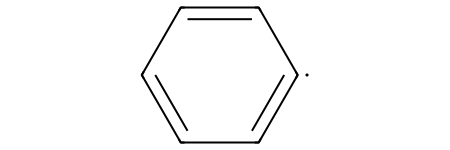

In [69]:
# All broken bonds are left as radicals
select_molecule(toluene, "ring", broken_bonds="radicals")

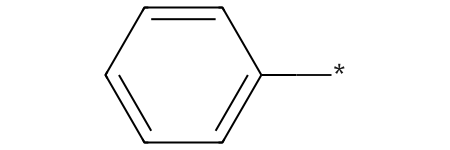

In [70]:
# Extract a fragment and keep it "wildcards" ([c]1ccccc1)
select_molecule(toluene, "ring", broken_bonds="wildcards")

In [87]:
# You can optionally return a mapping between the new atom IDs to the original atom IDs of the query molecule
subset, atom_mapping, bond_mapping = select_molecule(toluene, "ring", return_mapping=True)

In [88]:
# Mapping from new to old atom IDs
atom_mapping

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}

In [89]:
# Mapping from new to old bond IDs

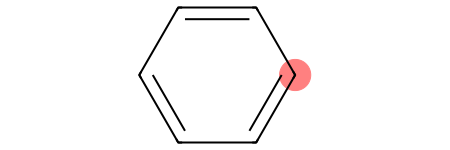

In [90]:
# New atom ID
highlight_atoms(subset, atom_ids=[0])

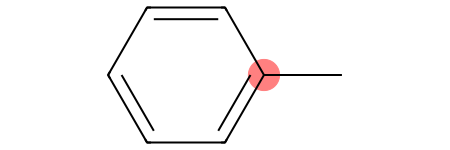

In [91]:
# Maps to old atom ID
highlight_atoms(toluene, atom_ids=[1])